<a href="https://colab.research.google.com/github/roscoekerby/python-projects/blob/main/QR_Code_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import



In [2]:
!pip install qrcode[pil]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.7 MB/s eta 0:00:00


# Example Output Given Before Code

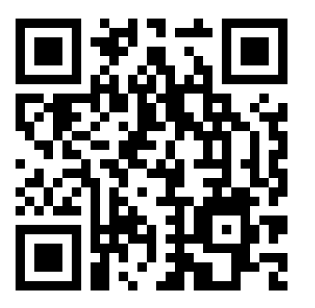

In [14]:
import qrcode
from PIL import Image

def create_qr_code(url, output_file="qr_code.png"):
    # Create QR code instance
    qr = qrcode.QRCode(
        version=None,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )

    # Add data to the QR code
    qr.add_data(url)
    qr.make(fit=True)

    # Create an image from the QR code
    qr_image = qr.make_image(fill_color="black", back_color="white")

    # Save the image
    qr_image.save(output_file)
    print(f"QR code saved as {output_file}")

# Get website input from user
website = input("Enter the website URL: ")

# Generate QR code
create_qr_code(website)

Enter the website URL: https://linktr.ee/themusclegrowthpodcast
QR code saved as qr_code.png


# QR with scan me text

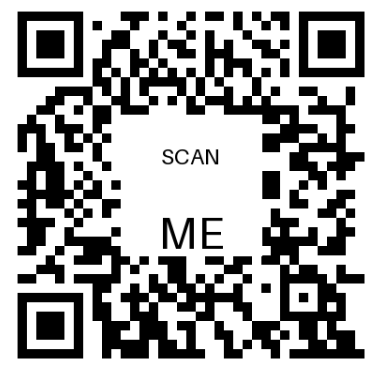

In [18]:
import qrcode
from PIL import Image, ImageDraw, ImageFont

def create_qr_code_with_text(url, output_file="qr_code_with_text.png"):
    # Create QR code instance
    qr = qrcode.QRCode(
        version=None,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=10,
        border=4,
    )

    # Add data to the QR code
    qr.add_data(url)
    qr.make(fit=True)

    # Create an image from the QR code
    qr_image = qr.make_image(fill_color="black", back_color="white").convert('RGB')

    # Create a drawing object
    draw = ImageDraw.Draw(qr_image)

    # Get image size
    img_size = qr_image.size[0]

    # Define safe area (avoid QR code corner markers and central timing patterns)
    safe_area_start = img_size // 4
    safe_area_end = 3 * img_size // 4

    # Calculate square size (reduced to preserve functionality)
    square_size = img_size // 3

    # Position the square in the center
    square_pos = ((img_size - square_size) // 2, (img_size - square_size) // 2)

    # Draw white square
    draw.rectangle([square_pos, (square_pos[0] + square_size, square_pos[1] + square_size)], fill="white")

    # Use bold fonts (adjust paths as needed)
    try:
        small_font = ImageFont.truetype("ariblk.ttf", 24)  # For "SCAN"
        large_font = ImageFont.truetype("ariblk.ttf", 48)  # For "ME"
    except IOError:
        small_font = ImageFont.load_default().font_variant(size=24)
        large_font = ImageFont.load_default().font_variant(size=48)

    # Draw "SCAN"
    scan_text = "SCAN"
    scan_bbox = draw.textbbox((0, 0), scan_text, font=small_font)
    scan_width = scan_bbox[2] - scan_bbox[0]
    scan_height = scan_bbox[3] - scan_bbox[1]
    scan_pos = ((img_size - scan_width) // 2, square_pos[1] + (square_size // 4) - (scan_height // 2))
    draw.text(scan_pos, scan_text, font=small_font, fill="black")

    # Draw "ME"
    me_text = "ME"
    me_bbox = draw.textbbox((0, 0), me_text, font=large_font)
    me_width = me_bbox[2] - me_bbox[0]
    me_height = me_bbox[3] - me_bbox[1]
    me_pos = ((img_size - me_width) // 2, square_pos[1] + (3 * square_size // 4) - (me_height // 2))
    draw.text(me_pos, me_text, font=large_font, fill="black")

    # Save the image
    qr_image.save(output_file)
    print(f"QR code with text saved as {output_file}")

# Get website input from user
website = input("Enter the website URL: ")

# Generate QR code with text
create_qr_code_with_text(website)

Enter the website URL: https://linktr.ee/themusclegrowthpodcast
QR code with text saved as qr_code_with_text.png


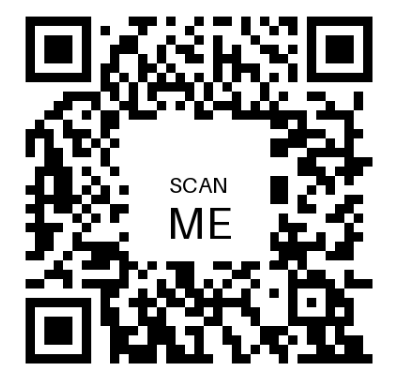

In [12]:
import qrcode
from PIL import Image, ImageDraw, ImageFont

def create_qr_code_with_text(url, output_file="qr_code_with_text.png"):
    # Create QR code instance
    qr = qrcode.QRCode(
        version=None,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=10,
        border=4,
    )

    # Add data to the QR code
    qr.add_data(url)
    qr.make(fit=True)

    # Create an image from the QR code
    qr_image = qr.make_image(fill_color="black", back_color="white").convert('RGB')

    # Create a drawing object
    draw = ImageDraw.Draw(qr_image)

    # Get image size
    img_size = qr_image.size[0]

    # Calculate square size (reduced to preserve functionality)
    square_size = img_size // 3

    # Position the square in the center
    square_pos = ((img_size - square_size) // 2, (img_size - square_size) // 2)

    # Draw white square
    draw.rectangle([square_pos, (square_pos[0] + square_size, square_pos[1] + square_size)], fill="white")

    # Use bold fonts (adjust paths as needed)
    try:
        small_font = ImageFont.truetype("ariblk.ttf", 24)  # For "SCAN"
        large_font = ImageFont.truetype("ariblk.ttf", 48)  # For "ME"
    except IOError:
        small_font = ImageFont.load_default().font_variant(size=24)
        large_font = ImageFont.load_default().font_variant(size=48)

    # Draw "SCAN"
    scan_text = "SCAN"
    scan_bbox = draw.textbbox((0, 0), scan_text, font=small_font)
    scan_width = scan_bbox[2] - scan_bbox[0]
    scan_height = scan_bbox[3] - scan_bbox[1]
    scan_pos = (square_pos[0] + (square_size - scan_width) // 2,
                square_pos[1] + (square_size // 2) - scan_height - 5)
    draw.text(scan_pos, scan_text, font=small_font, fill="black")

    # Draw "ME"
    me_text = "ME"
    me_bbox = draw.textbbox((0, 0), me_text, font=large_font)
    me_width = me_bbox[2] - me_bbox[0]
    me_height = me_bbox[3] - me_bbox[1]
    me_pos = (square_pos[0] + (square_size - me_width) // 2,
              square_pos[1] + (square_size // 2) + 5)
    draw.text(me_pos, me_text, font=large_font, fill="black")

    # Save the image
    qr_image.save(output_file)
    print(f"QR code with text saved as {output_file}")

# Get website input from user
website = input("Enter the website URL: ")

# Generate QR code with text
create_qr_code_with_text(website)

Enter the website URL: https://linktr.ee/themusclegrowthpodcast
QR code with text saved as qr_code_with_text.png


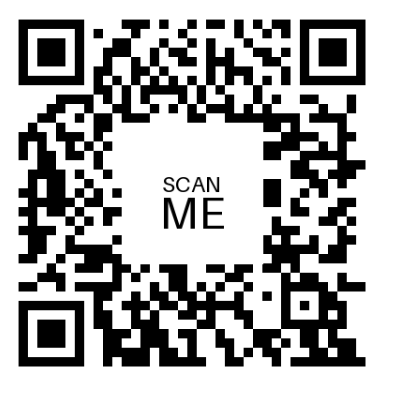

In [19]:
import qrcode
from PIL import Image, ImageDraw, ImageFont

def create_qr_code_with_text(url, output_file="qr_code_with_text.png"):
    # Create QR code instance
    qr = qrcode.QRCode(
        version=None,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=10,
        border=4,
    )

    # Add data to the QR code
    qr.add_data(url)
    qr.make(fit=True)

    # Create an image from the QR code
    qr_image = qr.make_image(fill_color="black", back_color="white").convert('RGB')

    # Create a drawing object
    draw = ImageDraw.Draw(qr_image)

    # Get image size
    img_size = qr_image.size[0]

    # Calculate square size (reduced to preserve functionality)
    square_size = img_size // 3

    # Position the square in the center
    square_pos = ((img_size - square_size) // 2, (img_size - square_size) // 2)

    # Draw white square
    draw.rectangle([square_pos, (square_pos[0] + square_size, square_pos[1] + square_size)], fill="white")

    # Use bold fonts (adjust paths as needed)
    try:
        small_font = ImageFont.truetype("ariblk.ttf", 24)  # For "SCAN"
        large_font = ImageFont.truetype("ariblk.ttf", 48)  # For "ME"
    except IOError:
        small_font = ImageFont.load_default().font_variant(size=24)
        large_font = ImageFont.load_default().font_variant(size=48)

    # Calculate total height of "SCAN ME"
    scan_bbox = draw.textbbox((0, 0), "SCAN", font=small_font)
    me_bbox = draw.textbbox((0, 0), "ME", font=large_font)
    total_height = (scan_bbox[3] - scan_bbox[1]) + (me_bbox[3] - me_bbox[1])

    # Calculate vertical starting position to center both texts
    start_y = square_pos[1] + (square_size - total_height) // 2

    # Draw "SCAN"
    scan_text = "SCAN"
    scan_bbox = draw.textbbox((0, 0), scan_text, font=small_font)
    scan_width = scan_bbox[2] - scan_bbox[0]
    scan_height = scan_bbox[3] - scan_bbox[1]
    scan_pos = (square_pos[0] + (square_size - scan_width) // 2, start_y)
    draw.text(scan_pos, scan_text, font=small_font, fill="black")

    # Draw "ME"
    me_text = "ME"
    me_bbox = draw.textbbox((0, 0), me_text, font=large_font)
    me_width = me_bbox[2] - me_bbox[0]
    me_height = me_bbox[3] - me_bbox[1]
    me_pos = (square_pos[0] + (square_size - me_width) // 2, start_y + scan_height)
    draw.text(me_pos, me_text, font=large_font, fill="black")

    # Save the image
    qr_image.save(output_file)
    print(f"QR code with text saved as {output_file}")

# Get website input from user
website = input("Enter the website URL: ")

# Generate QR code with text
create_qr_code_with_text(website)

Enter the website URL: https://linktr.ee/themusclegrowthpodcast
QR code with text saved as qr_code_with_text.png
